# STEPS FOR MACHINE LEARNING

## Step 0: Import the necessary libraries

In [52]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets._samples_generator import make_blobs 
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Step 1: Import Data

In [15]:
file = pd.read_excel("Online Retail.xlsx")
file.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Step 2: Clean the Data

In [38]:
#['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
n_file = file.drop(['CustomerID', 'InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', "Description"], axis='columns')

In [39]:
n_file.head()

,Quantity,UnitPrice,Country
0,6,2.55,United Kingdom
1,6,3.39,United Kingdom
2,8,2.75,United Kingdom
3,6,3.39,United Kingdom
4,6,3.39,United Kingdom


In [40]:
n_file.shape

(541909, 3)

In [42]:
#to see how many null values I have
print(sum(n_file.isnull().values.ravel()))
#Drop row that contain null value
n_file = n_file.dropna(axis='index')

0


In [55]:
n_file.dtypes

Quantity       int64
UnitPrice    float64
Country        int64
dtype: object

In [54]:
n_file.groupby("Country").mean()

,Quantity,UnitPrice
Country,,
0,66.444003,3.220612
1,12.037406,4.243192
2,13.684211,4.556316
3,11.189947,3.644335
4,11.125000,4.456250
5,18.298013,6.030331
6,12.505277,4.932124
7,10.155949,6.302363
8,19.733333,2.938333


In [53]:
#Conver "Country" data to number
label_encoder = LabelEncoder()
n_file["Country"] = label_encoder.fit_transform(n_file["Country"])

## Step 3: Normalize the data

In [57]:
X = n_file.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.02130135,  0.27965099],
       [-0.01262006,  0.27965099],
       [-0.01923438,  0.27965099],
       ...,
       [-0.00476555, -3.41640162],
       [-0.00476555, -3.41640162],
       [ 0.00350235, -3.41640162]])

## Step 4: Create a Model

In [58]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

## Step 5: Cluster the data

In [66]:
# add to new file that I made it in step 2
n_file["Clus"] = labels
n_file.groupby('Clus').mean()

,Quantity,UnitPrice,Country
Clus,,,
0,9.553059,3.959793,34.259784
1,-0.642857,7479.926905,34.071429
2,-1.000000,38970.000000,36.000000


In [72]:
## add to orginal file
file["Clus"] = labels
file.groupby('Clus').first()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Clus,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,16029.0,United Kingdom
2,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom


In [73]:
file.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Clus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


## Step 6: visualization

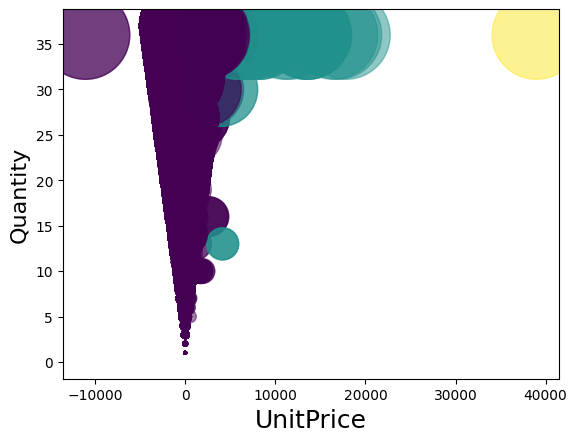

In [64]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('UnitPrice', fontsize=18)
plt.ylabel('Quantity', fontsize=16)
#Althogh it's not working well, I'm did that 
plt.show()